In [21]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
titanic_df = pd.read_csv('D://Study/Repositories/temp/Titanic-GettingStarted/Data/train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Giải thích ý nghĩa các cột:
- PassengerId : Mã hành khách
- Survived : Trạng thái của hành khách (1: sống sót; 2: không sống sót)
- Pclass : Hạng ghế mà hành khách đã ngồi
- Name : Tên hành khách
- Sex : Giới tính
- Age : Tuổi
- SibSp : Hành khách có anh/chị em đi cùng hay không (1: có; 2: không)
- Parch : Hành khách có cha/mẹ hay con cái đi cùng hay không (1: có; 2: không)
- Ticket : Vé tàu
- Fare : Giá tiền mà hành khách đã trả cho vé tàu
- Cabin : Khoang tàu mà hành khách ngồi
- Embarked : Có 3 giá trị S,C,Q đại diện cho các thành phố (C: Cherbourg, Q: Queenstown, S: Southampton)

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Nhận xét tập dữ liệu:

- Giá trị ở 2 cột Age, cột Cabin, cột Embarked bị thiếu

In [7]:
# Tính số lượng giá trị bị thiếu ở các cột

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Tính tỉ lệ phần trăm dữ liệu bị thiếu

for column in titanic_df.columns:
    percent = titanic_df[column].isnull().mean()
    print(f'{column}:{round(percent*100,2)}%')

PassengerId:0.0%
Survived:0.0%
Pclass:0.0%
Name:0.0%
Sex:0.0%
Age:19.87%
SibSp:0.0%
Parch:0.0%
Ticket:0.0%
Fare:0.0%
Cabin:77.1%
Embarked:0.22%


<AxesSubplot:xlabel='Sex', ylabel='count'>

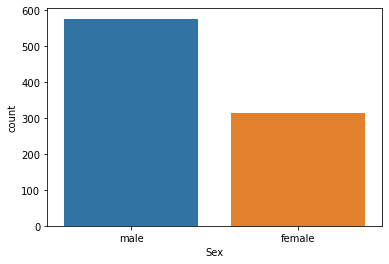

In [4]:
# Thống kê giới tính hành khách có mặt trên tàu

sns.countplot(x = titanic_df['Sex'], data=titanic_df)

Nhận xét: 

- Số lượng hành khách nam nhiều hơn hành khác nữ

<AxesSubplot:xlabel='Sex', ylabel='count'>

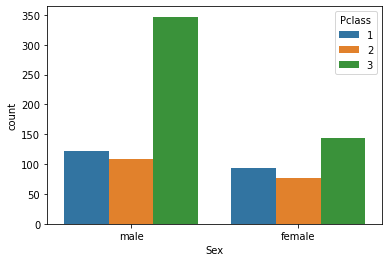

In [5]:
# Phân bố hạng ghế theo giới tính

sns.countplot(x = titanic_df['Sex'], hue = titanic_df['Pclass'], data = titanic_df)

Nhận xét:

- Sự chênh lệch về hạng ghế ngồi ở giới tính nam thể hiện rõ hơn, đa số hành khách giới tính nam chọn hạng ghế là 3
- Ở giới tính nữ, sự phân bố về hạng ghế ngồi đồng đều hơn, hạng ghế là 3 được lựa chọn nhiều nhất

<AxesSubplot:xlabel='Pclass', ylabel='count'>

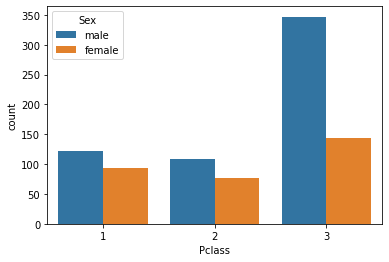

In [6]:
# Phân bố giới tính theo hạng ghế

sns.countplot(x = titanic_df['Pclass'], hue = titanic_df['Sex'], data = titanic_df)

Nhận xét:

- Hạng ghế 3 được lựa chọn nhiều nhất ở cả hành khách nam và hành khách nữ. Kế đó là hạng ghế 1, cuối cùng là hạng ghế 2

In [9]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [64]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis = 1)

In [65]:
titanic_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


<AxesSubplot:xlabel='Pclass', ylabel='count'>

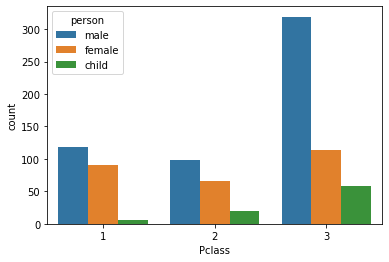

In [66]:
# Phân bố hạng ghế theo độ tuổi

sns.countplot(x = titanic_df['Pclass'], hue = titanic_df['person'], data = titanic_df)

<AxesSubplot:>

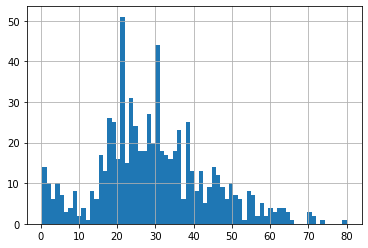

In [67]:
titanic_df['Age'].hist(bins=70)

In [16]:
titanic_df['Age'].mean()

29.69911764705882

In [18]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

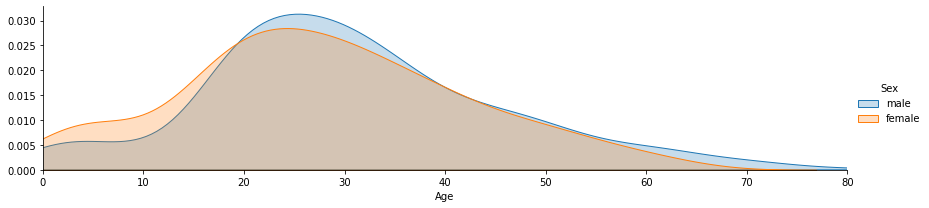

In [30]:
# Tạo đồ thị thể hiện phân bố độ tuổi và giới tính (nam, nữ)

fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect=4) # FacetGrid yêu cầu 1 đối tượng lưu trữ

fig.map(sns.kdeplot,'Age',shade = True) # Sử dụng KDE plot để ánh xạ giá trị cột Age vào đối tượng fig

oldest = titanic_df['Age'].max() # Lấy giá trị lớn nhất của cột Age

fig.set(xlim=(0,oldest)) # Đặt giới hạn cho đối tượng fig từ 0 đến giá trị max của Age

fig.add_legend() # Thêm chú thích

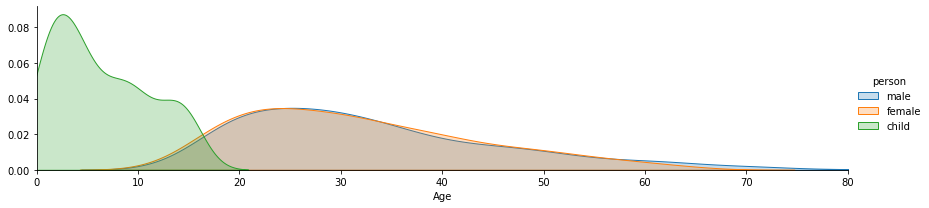

In [31]:
# Tạo đồ thị thể hiện phân bố độ tuổi và giới tính (nam, nữ, trẻ em)

fig = sns.FacetGrid(titanic_df, hue = 'person', aspect=4) # FacetGrid yêu cầu 1 đối tượng lưu trữ

fig.map(sns.kdeplot,'Age',shade = True) # Sử dụng KDE plot để ánh xạ giá trị cột Age vào đối tượng fig

oldest = titanic_df['Age'].max() # Lấy giá trị lớn nhất của cột Age

fig.set(xlim=(0,oldest)) # Đặt giới hạn cho đối tượng fig từ 0 đến giá trị max của Age

fig.add_legend() # Thêm chú thích

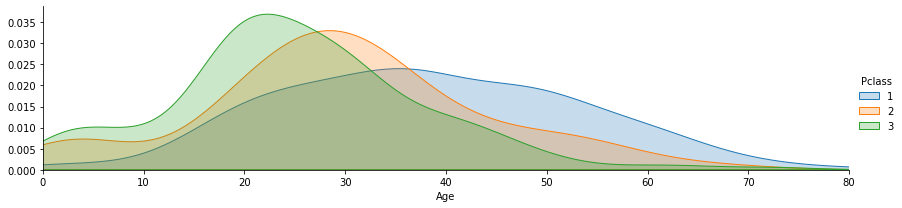

In [32]:
# Tạo đồ thị thể hiện phân bố độ tuổi và hạng ghế

fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect=4) # FacetGrid yêu cầu 1 đối tượng lưu trữ

fig.map(sns.kdeplot,'Age',shade = True) # Sử dụng KDE plot để ánh xạ giá trị cột Age vào đối tượng fig

oldest = titanic_df['Age'].max() # Lấy giá trị lớn nhất của cột Age

fig.set(xlim=(0,oldest)) # Đặt giới hạn cho đối tượng fig từ 0 đến giá trị max của Age

fig.add_legend() # Thêm chú thích

In [68]:
# Xóa các dòng bị thiếu dữ liệu ở cột Cabin

deck = titanic_df['Cabin'].dropna()

In [69]:
deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

Nhận xét:

- **deck** mang ý nghĩa là boong tàu. Bao gồm các kí hiệu A,B,C,D,E,F,G,T và theo sau là số cabin. Vấn đề cần làm là lấy được chữ cái đầu tiên để thực hiện các công việc tiếp theo

<AxesSubplot:xlabel='Cabin', ylabel='count'>

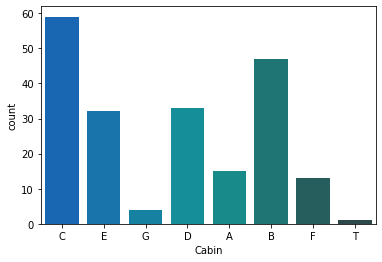

In [70]:
levels = [] # Tạo một list rỗng để chứa các kí tự đầu của deck

# Dùng vòng lặp for để lấy ra kí tự đầu tiên của deck
for level in deck:
    levels.append(level[0])

# Tạo 1 DataFrame mới chứa các giá trị của list levels
cabin_df = DataFrame(levels)

# Đặt tên cột của DataFrame vừa tạo
cabin_df.columns = ['Cabin']

# Biểu đồ thể hiện số lượng cabin và số lượng hành khách của cabin đó
sns.countplot('Cabin', data = cabin_df, palette='winter_d')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

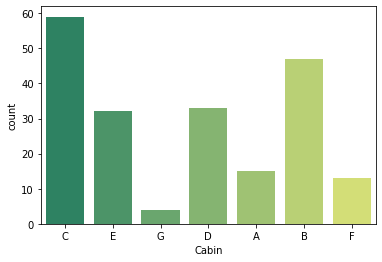

In [71]:
# Không lấy cabin bắt đầu bằng 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']

# Biểu đồ thể hiện số lượng cabin và số lượng hành khách của cabin đó
sns.countplot('Cabin', data = cabin_df, palette='summer')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

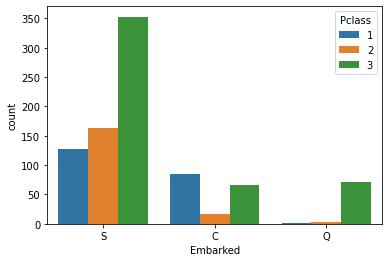

In [72]:
# Phân bố thành phố nơi mà hành phố đến từ đó với hạng ghế

sns.countplot('Embarked', data = titanic_df, hue = 'Pclass')

Nhận xét: (C: Cherbourg, Q: Queenstown, S: Southampton)

- Hành khách đến từ thành phố Southampton chiếm đa số. Họ lựa chọn hạng ghế 3 là phổ biến, kế đến là hạng ghế 2, cuối cùng là 1
- Hàng khách đến từ thành phố Queenstown chiếm ít nhất. Đa số lựa chọn hạng ghế 3

In [73]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [74]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,0


In [75]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [76]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone


<AxesSubplot:xlabel='Alone', ylabel='count'>

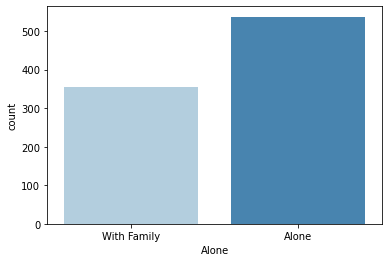

In [77]:
sns.countplot('Alone', data = titanic_df, palette='Blues')

In [79]:
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no', 1: 'yes'})
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone,no
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone,yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family,no
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone,yes


<AxesSubplot:xlabel='Survivor', ylabel='count'>

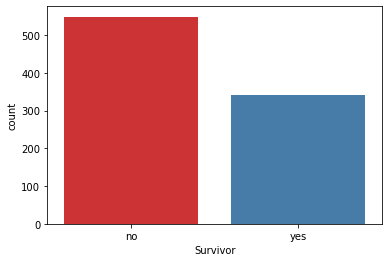

In [80]:
sns.countplot('Survivor', data = titanic_df, palette = 'Set1')

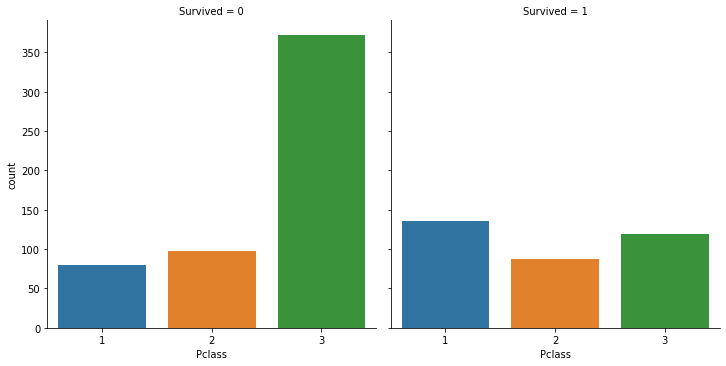

In [91]:
# Yếu tố hạng ghế và số hành khách sống sót

sns.catplot(x = 'Pclass', col = 'Survived', data = titanic_df, kind = 'count')

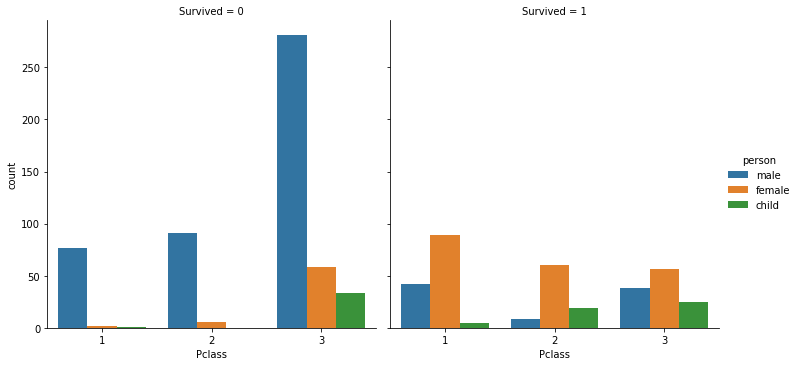

In [92]:
sns.catplot(x = 'Pclass', col = 'Survived', hue = 'person', data = titanic_df, kind = 'count')

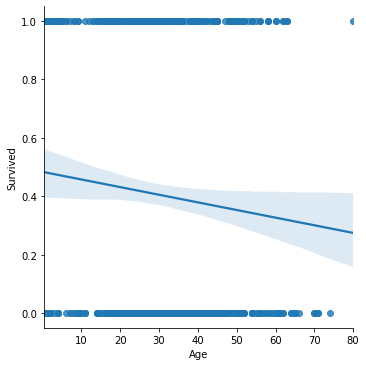

In [93]:
sns.lmplot('Age', 'Survived', data = titanic_df)

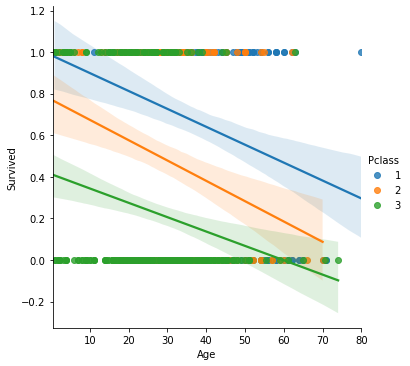

In [94]:
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df)

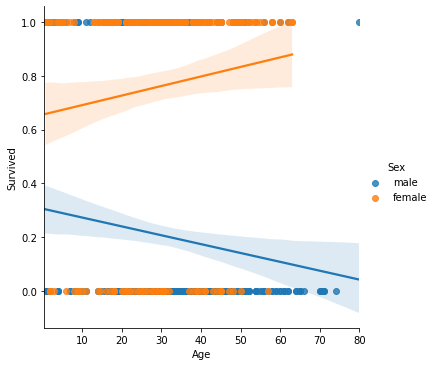

In [95]:
sns.lmplot('Age', 'Survived', hue = 'Sex', data = titanic_df)